<a href="https://colab.research.google.com/github/kkkeennn1233/Algorithm_TSP/blob/main/TSP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import random,time
import matplotlib.pyplot as plt
import numpy as np
#建立城市之間距離運用字典
def SetCostMatrix(num):# 建立一個距離矩陣
    cmatrix ={}
    for i in range(0, num):
        for j in range(0, num):
            if i == j:
                cmatrix[(i, j)] = 0
            else:
              if j>i:
                cmatrix[(i, j)] = random.randint(1, 30) # 每條邊權重包含(1-30)
              else:
                cmatrix[(i, j)] =cmatrix[(j, i)] # 同樣的點到同樣的點距離改成0
    print(cmatrix)
    return cmatrix

#字典查值
def GetCostVal(row, col):
    return cities_matrix[(row, col)] # 查距離***查字典值的

In [17]:
#TSP_DP 動態規劃 Dynamic_Programing
def TSPGetMinDistance(start, cities):
  D=[]
  if len(cities) == 0:
        minDis = GetCostVal(start,0)
        return minDis
  else:
    for i in range(len(cities)):
          dcities = cities[:]
          dcities.remove(cities[i])
          D.append(GetCostVal(start,cities[i]) + TSPGetMinDistance(cities[i],dcities))
  return (min(D))

In [18]:
#TSP_GY 貪婪演算法 Greedy_Algorithm
import sys
def Greedy_TSP(source,cities):#(起點,經過城市)
  tour_Len =0 #總長度
  cur = source
  for j in range (len(cities)):#便利經過城市
    next = 0 #先預設下一個去的城市
    min_Dist = sys.maxsize #路徑最大可能數 
    #print(cities)#城市矩陣
    for j in cities:
      if GetCostVal(cur,j) < min_Dist:
        next = j
        min_Dist = GetCostVal(cur, j)
    cities.remove(next)
    tour_Len += min_Dist
    cur = next
  tour_Len += GetCostVal(cur, source)
  return (tour_Len)


In [19]:
TSP_time_DP=[] #紀錄經過城市時間差_DP
TSP_time_GY=[] #紀錄經過城市時間差_GY

def average_DP():
  TSP_round_time_DP = [] #存取5次時間差
  for i in range(5):
    start_time = time.time()#起始時間
    main_DP()
    end_time = time.time()#結束時間
    # print(end_time-start_time)
    TSP_round_time_DP.append(end_time-start_time)#時間差
  avg_time = (np.mean(TSP_round_time_DP))#平均時間差
  TSP_time_DP.append(np.mean(avg_time))
  #print(TSP_time_DP)

def average_GY():
  TSP_round_time_GY = [] #存取5次時間差
  for i in range(5):
    start_time = time.time()#起始時間
    main_GY()
    end_time = time.time()#結束時間
    # print(end_time-start_time)
    TSP_round_time_GY.append(end_time-start_time)#時間差
  avg_time = (np.mean(TSP_round_time_GY))#平均時間差
  TSP_time_GY.append(np.mean(avg_time))
  #print(TSP_time_GY)

TSP_DP_Min_Matrix =[] #紀錄經過城市最短距離和_DP
def main_DP():
  TSP_DP_Min = TSPGetMinDistance(start_point,cities_name)
  # print(TSP_DP_Min)最短路徑DP
  TSP_DP_Min_Matrix.append(TSP_DP_Min) #最小路徑加入陣列_DP

  
  
TSP_GY_Min_Matrix =[] #紀錄經過城市最短距離和_DP
def main_GY():
  TSP_GY_Min = Greedy_TSP(start_point,cities_name)
  #print(TSP_GY_Min) 最短路徑GY
  TSP_GY_Min_Matrix.append(TSP_GY_Min) #最小路徑加入陣列_GY

for i in range(4,14):
    random_points = i # 有幾座城市
    cities_matrix = SetCostMatrix(random_points) #城市距離字典
    start_point = 0 # 從0出發
    cities_name = [i for i in range(1,random_points)] #除了起點0的城市的points
    average_DP()
    average_GY()
print(TSP_DP_Min_Matrix)
print(TSP_GY_Min_Matrix)


{(0, 0): 0, (0, 1): 28, (0, 2): 21, (0, 3): 19, (1, 0): 28, (1, 1): 0, (1, 2): 1, (1, 3): 19, (2, 0): 21, (2, 1): 1, (2, 2): 0, (2, 3): 24, (3, 0): 19, (3, 1): 19, (3, 2): 24, (3, 3): 0}
{(0, 0): 0, (0, 1): 3, (0, 2): 14, (0, 3): 17, (0, 4): 30, (1, 0): 3, (1, 1): 0, (1, 2): 5, (1, 3): 9, (1, 4): 20, (2, 0): 14, (2, 1): 5, (2, 2): 0, (2, 3): 24, (2, 4): 25, (3, 0): 17, (3, 1): 9, (3, 2): 24, (3, 3): 0, (3, 4): 26, (4, 0): 30, (4, 1): 20, (4, 2): 25, (4, 3): 26, (4, 4): 0}
{(0, 0): 0, (0, 1): 2, (0, 2): 18, (0, 3): 14, (0, 4): 2, (0, 5): 25, (1, 0): 2, (1, 1): 0, (1, 2): 23, (1, 3): 24, (1, 4): 12, (1, 5): 27, (2, 0): 18, (2, 1): 23, (2, 2): 0, (2, 3): 8, (2, 4): 18, (2, 5): 14, (3, 0): 14, (3, 1): 24, (3, 2): 8, (3, 3): 0, (3, 4): 10, (3, 5): 13, (4, 0): 2, (4, 1): 12, (4, 2): 18, (4, 3): 10, (4, 4): 0, (4, 5): 19, (5, 0): 25, (5, 1): 27, (5, 2): 14, (5, 3): 13, (5, 4): 19, (5, 5): 0}
{(0, 0): 0, (0, 1): 14, (0, 2): 11, (0, 3): 18, (0, 4): 11, (0, 5): 4, (0, 6): 8, (1, 0): 14, (1, 1): 

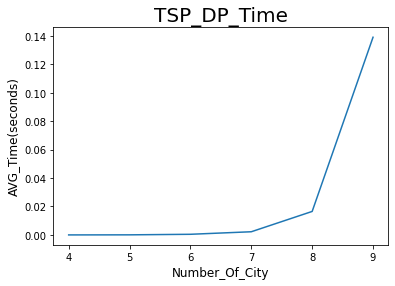

In [20]:
#DP圖
xpt = [i for i in range(4,14)]
ypt = TSP_time_DP
plt.plot(xpt,ypt) #畫線
plt.title("TSP_DP_Time", fontsize=20) #圖表標題
plt.xlabel("Number_Of_City", fontsize=12) #x軸標題
plt.ylabel("AVG_Time(seconds)", fontsize=12) #y軸標題
plt.show() #顯示繪製的圖形

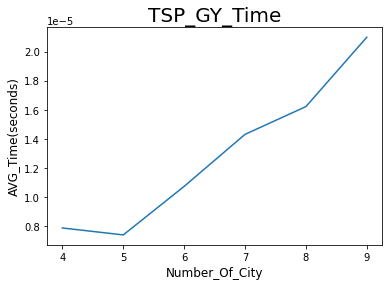

In [21]:
#GY圖
xpt = [i for i in range(4,14)]
ypt = TSP_time_GY
plt.plot(xpt,ypt) #畫線
plt.title("TSP_GY_Time", fontsize=20) #圖表標題
plt.xlabel("Number_Of_City", fontsize=12) #x軸標題
plt.ylabel("AVG_Time(seconds)", fontsize=12) #y軸標題
plt.show() #顯示繪製的圖形

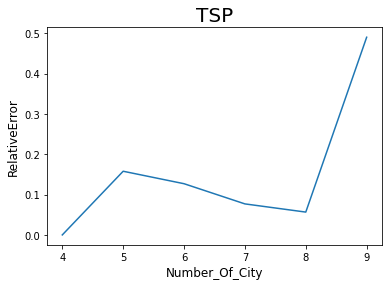

In [22]:
#GY圖
xpt = [i for i in range(4,14)]
DP=np.array(TSP_DP_Min_Matrix)
GY=np.array(TSP_GY_Min_Matrix)
ypt = (GY-DP)/DP #( |(GY值-DP值)| )/ (DP值)
plt.plot(xpt,ypt) #畫線
plt.title("TSP", fontsize=20) #圖表標題
plt.xlabel("Number_Of_City", fontsize=12) #x軸標題
plt.ylabel("RelativeError", fontsize=12) #y軸標題
plt.show() #顯示繪製的圖形